In [18]:
# 부채비율, 매출액 증가율, 영업이익 증가율, 당기순이익 증가율과 주가 간의 관계

import pandas as pd

data = pd.read_csv("data/재무제표_분석용데이터.csv", encoding="euc-kr")
data.drop(['ROA', 'ROE', '배당금', 'PER'], axis=1, inplace=True)
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100
data.dropna(inplace = True)

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

# 수익률과의 상관관계 확인

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,현재_주가,미래_주가,수익률
연도,1.0000,0.0078,-0.0085,0.0029,0.0057,-0.0364,-0.0135,0.1770
부채비율,0.0078,1.0000,0.0060,0.0040,-0.0026,0.0459,0.0479,-0.0128
매출액증가율,-0.0085,0.0060,1.0000,0.2653,0.3281,0.0041,0.0048,0.0096
영업이익증가율,0.0029,0.0040,0.2653,1.0000,0.0853,-0.0011,-0.0011,-0.0009
당기순이익증가율,0.0057,-0.0026,0.3281,0.0853,1.0000,0.0030,0.0050,0.0092
현재_주가,-0.0364,0.0459,0.0041,-0.0011,0.0030,1.0000,0.9184,-0.0632
미래_주가,-0.0135,0.0479,0.0048,-0.0011,0.0050,0.9184,1.0000,0.0539
수익률,0.1770,-0.0128,0.0096,-0.0009,0.0092,-0.0632,0.0539,1.0000


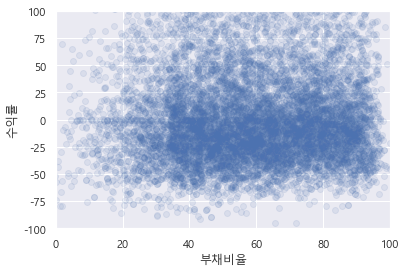

In [21]:
# 부채 비율과 수익률

plt.scatter(data['부채비율'], data['수익률'], alpha = 0.1)
plt.xlabel("부채비율")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)

data.corr().round(4)

# 부채비율과 수익률은 상관관계가 없다고 볼 수 있음
# 선형 상관관계가 없다고 해서 관계가 없다고 할 순 없음. ex) y = x**2는 상관계수가 0 에 가깝게 나옴

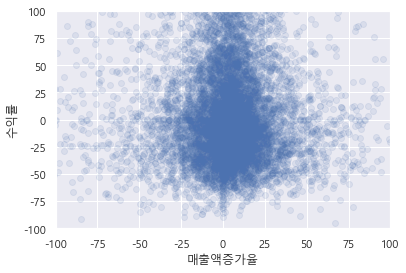

0.0095


In [23]:
# 매출액 증가율과 수익률. 매출액 증가율은 흑자지속일때만 나옴

temp = data.loc[data['매출액_상태'] == "흑자지속", ['매출액증가율', '수익률']]

plt.scatter(temp['매출액증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("매출액증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

print(temp.corr().loc['매출액증가율', '수익률'].round(4))

# 특별한 상관관계가 없고, 매출액 증가율이 대부분 0 근처에 몰려있음ㅇ업ㅇ

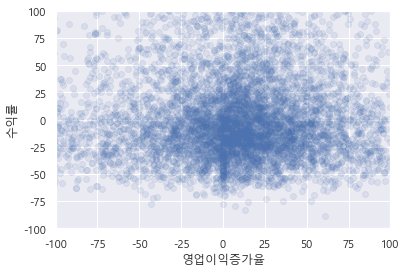

0.003


In [24]:
# 영업이익 증가율과 수익률

temp = data.loc[data['영업이익_상태'] == "흑자지속", ['영업이익증가율', '수익률']]
plt.scatter(temp['영업이익증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("영업이익증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

print(temp.corr().loc['영업이익증가율', '수익률'].round(4))

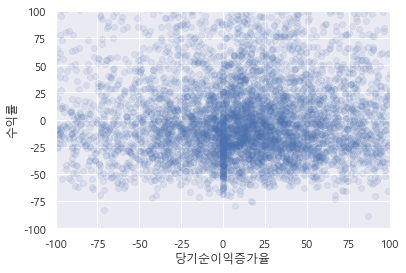

-0.0014


In [25]:
# 당기순이익 증가율과 수익률

temp = data.loc[data['당기순이익_상태'] == "흑자지속", ['당기순이익증가율', '수익률']]
plt.scatter(temp['당기순이익증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("당기순이익증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

print(temp.corr().loc['당기순이익증가율', '수익률'].round(4))

* 전체 지표 모두 수익률과 특별한 상관관계가 존재하지 않으므로 리밸런싱 코드는 실행하지 않음
* 책의 결과에서는, 모든 지표가 기대 수익과 정비례하지는 않지만, 지표가 크거나 작은 기업에 투자하는것이 중간 크기의 기업에 투자하는것보다는 낫다고 함